### Lets import necessary libs first

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the data set and do initial EDA operations

In [3]:
df=pd.read_csv("leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [452]:
#Dimensions of data
df.shape

(9240, 37)

In [453]:
#understand the statistical information about data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [454]:
#understand the struture of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Prepping and cleaning the data

In [455]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [456]:
###Lets drop the columns where the missing values are more than 2000

In [457]:
for x in df.columns:
    if df[x].isnull().sum()>2000:
        df.drop(x,1,inplace=True)

In [458]:
df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply 

In [459]:
#lets deep dive into data

In [460]:
df["Specialization"].astype("category").value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [461]:
df["City"].astype("category").value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [462]:
df["Last Notable Activity"].astype("category").value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [463]:
df["Lead Origin"].astype("category").value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [464]:
df["Lead Source"].astype("category").value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [465]:
df["Last Activity"].astype("category").value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [466]:
## remove few insignificant columns
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            7802 non-null   object 
 10  Search                              

In [468]:
df['Specialization'].replace({"select":np.nan},inplace=True)

In [469]:
df["Last Activity"].astype("category").value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

### Lets do the data transformation now

In [470]:
### we will now assign numerical values to categorical values

In [471]:
cat={"No":0,"Yes":1} 
df['Do Not Email']=df['Do Not Email'].map(cat)
df['Do Not call']=df['Do Not Email'].map(cat)
df['Search']=df['Search'].map(cat)
df['Magazine']=df['Magazine'].map(cat)
df['Newspaper Article']=df['Newspaper Article'].map(cat)
df['X Education Forums']=df['X Education Forums'].map(cat)
df['Newspaper']=df['Newspaper'].map(cat)
df['Digital Advertisement']=df['Digital Advertisement'].map(cat)
df['Through Recommendations']=df['Through Recommendations'].map(cat)
df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].map(cat)
df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].map(cat)
df['Get updates on DM Content']=df['Get updates on DM Content'].map(cat)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            7802 non-null   object 
 10  Search                              

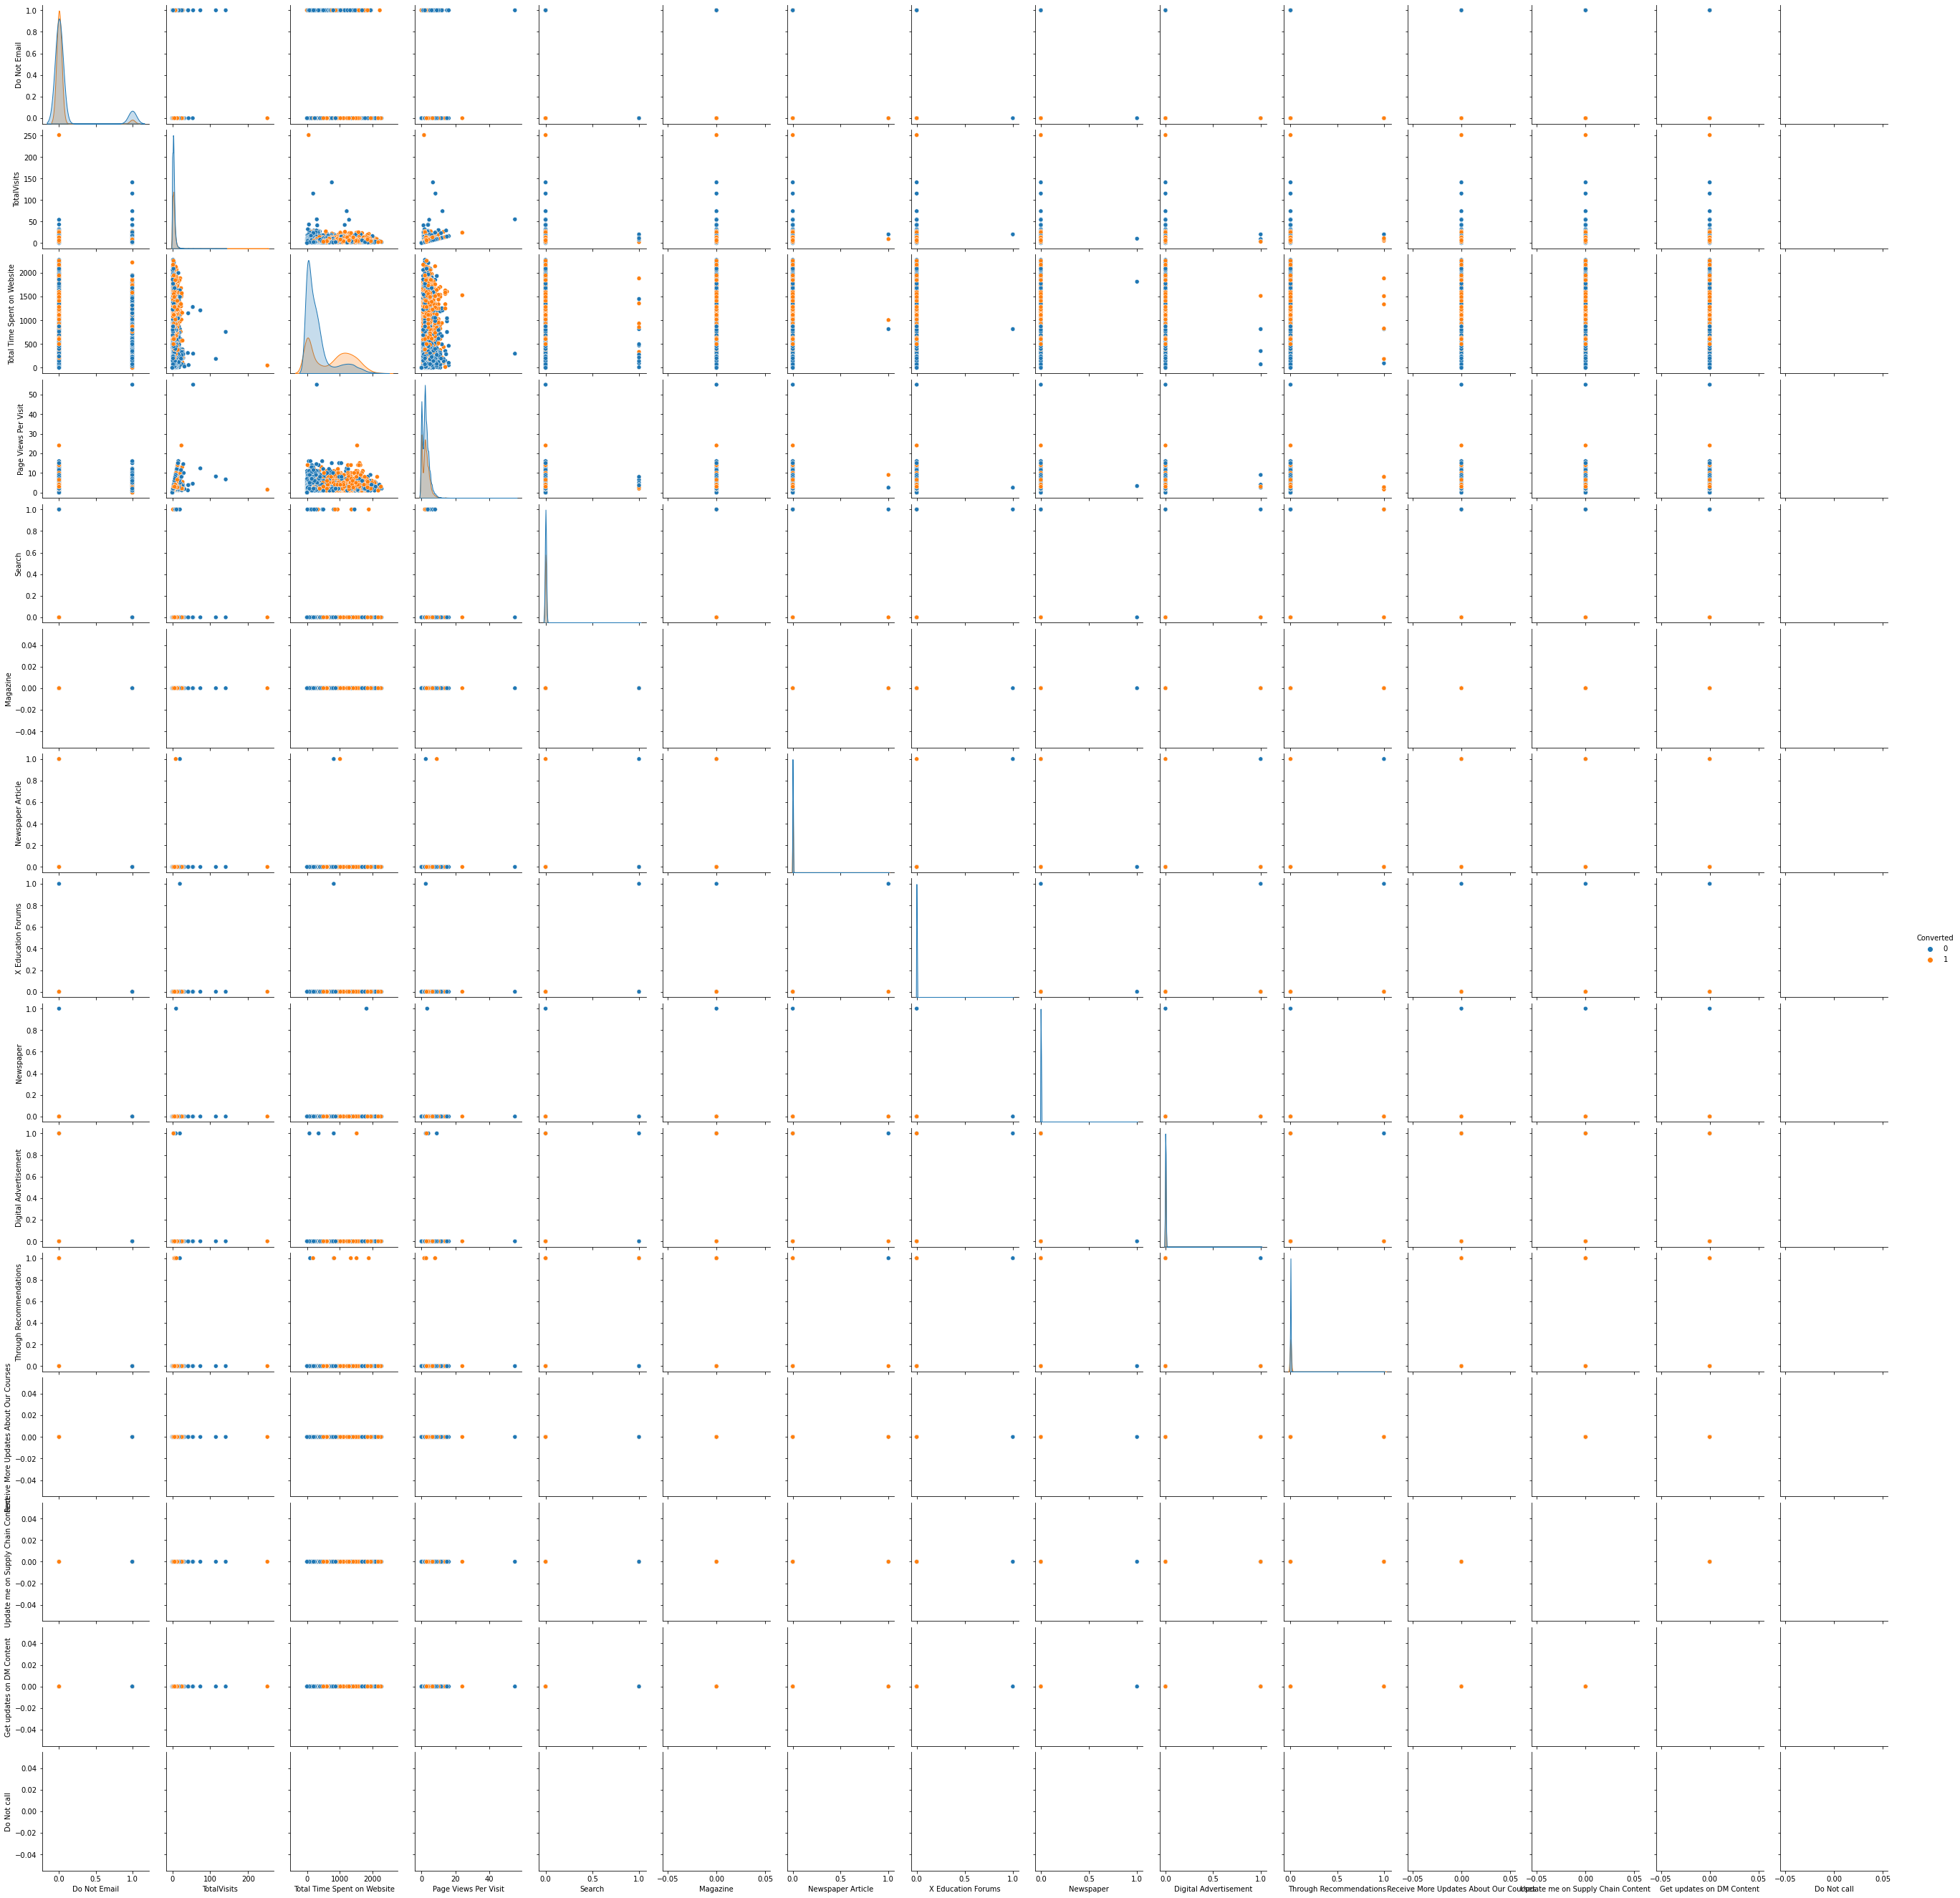

In [473]:
sb.pairplot(df,hue='Converted')
plt.show()

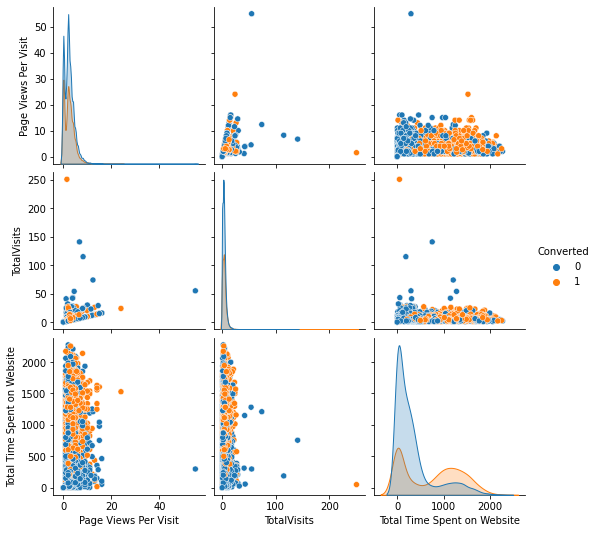

In [474]:
df1 = df[['Page Views Per Visit','TotalVisits','Total Time Spent on Website','Converted']]
sb.pairplot(df1,hue='Converted')
plt.show()

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            7802 non-null   object 
 10  Search                              

In [476]:
### we will now create the dummy variable and drop the first level

In [477]:
d_df=pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization']],drop_first=True)

df=pd.concat([df,d_df],axis=1)
df.shape

(9240, 98)

In [478]:
### now lets remove the columns for which we have already created the dummy values or are insignificant

df=df.drop(['Page Views Per Visit','Total Time Spent on Website','TotalVisits','Do Not Call','Lead Origin','Lead Source','Last Activity','Last Notable Activity','City','Specialization','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)
df.shape

(9240, 86)

### Data Preparation for Model



In [479]:
from sklearn.model_selection import train_test_split

In [480]:
## Test-Train split
a=df['Converted']
a.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [481]:
X=df.drop('Converted',1)
X.head()

,Do Not Email,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [482]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9240 non-null   int64  
 1   Converted                                           9240 non-null   int64  
 2   Search                                              9240 non-null   int64  
 3   Magazine                                            9240 non-null   int64  
 4   Newspaper Article                                   9240 non-null   int64  
 5   X Education Forums                                  9240 non-null   int64  
 6   Newspaper                                           9240 non-null   int64  
 7   Digital Advertisement                               9240 non-null   int64  
 8   Through Recommendations                             9240 non-null   int64  
 9

In [484]:
### we will now scale
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [485]:
## we will now analyze the correlation among the variables

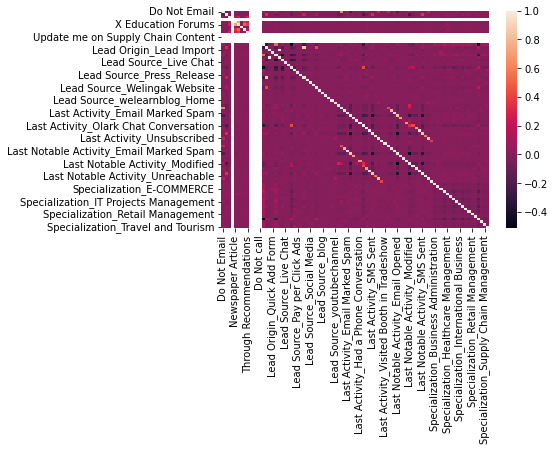

In [486]:
sb.heatmap(df.corr())
plt.show()

### Let's Build the Model now

In [487]:
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
linReg = LogisticRegression()
rfe = RFE(estimator=linReg, n_features_to_select=15)             
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 85 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        6468 non-null   int64  
 1   Search                                              6468 non-null   int64  
 2   Magazine                                            6468 non-null   int64  
 3   Newspaper Article                                   6468 non-null   int64  
 4   X Education Forums                                  6468 non-null   int64  
 5   Newspaper                                           6468 non-null   int64  
 6   Digital Advertisement                               6468 non-null   int64  
 7   Through Recommendations                             6468 non-null   int64  
 8   Receive More Updates About Our Courses              6468 non-null   int64  

In [488]:
## Dropping the Do not call column
X_train.drop(['Do Not call'],axis=1,inplace=True)

In [489]:
#fitting the log reg model
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('Search', False, 52),
 ('Magazine', False, 70),
 ('Newspaper Article', False, 33),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 47),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 65),
 ('Update me on Supply Chain Content', False, 66),
 ('Get updates on DM Content', False, 67),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 44),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 61),
 ('Lead Source_Live Chat', False, 59),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', False, 51),
 ('Lead Source_Organic Search', False, 55),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Reference', False, 34),
 ('Lead Source_R

In [490]:
c=X_train.columns[rfe.support_]
X_train = X_train[c]

In [491]:
X_train_sma = sma.add_constant(X_train)
lg2 = sma.GLM(y_train, X_train_sma, family = sma.families.Binomial())
res = lg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3386.4
Date:                Wed, 08 Dec 2021   Deviance:                       6772.7
Time:                        14:15:35   Pearson chi2:                 6.56e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8310      0.038    -21.946      0.000      -0.905      -0.757
Do Not Email                                      -1.3484      0.172     -7.833      0.000      -1.686      -1.011
Digital Advertisement                            -22.5404   1.66e+04     -0.001      0.999   -3.25e+04    3.25e+04
Through Recommendations                            2.2975      1.105      2.079      0.038       0.131       4.464
Lead Origin_Lead Add Form                          2.9208      0.179     16.353      0.000       2.571       3.271
Lead Origin_Quick Add Form                        24.8288   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Welingak Website                       1.3882      0.740      1.876      0.061      -0.062       2.839
Last Activity_Converted to Lead                   -1.2159      0.186     -6.533      0.000      -1.581      -0.851
Last Activity_Email Bounced                       -1.0833      0.356     -3.044      0.002      -1.781      -0.386
Last Activity_Email Received                      22.3971   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Activity_Had a Phone Conversation             1.3842      0.763      1.814      0.070      -0.112       2.880
Last Activity_Olark Chat Conversation             -1.5214      0.144    -10.554      0.000      -1.804      -1.239
Last Notable Activity_Email Bounced                1.7529      0.527      3.324      0.001       0.719       2.787
Last Notable Activity_Had a Phone Conversation     1.7494      1.297      1.349      0.177      -0.792       4.291
Last Notable Activity_SMS Sent                     1.4987      0.069     21.833      0.000       1.364       1.633
Last Notable Activity_Unreachable                  1.2402      0.467      2.653      0.008       0.324       2.156
==================================================================================================================
"""

In [492]:
#Now the next step is to calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [493]:
#creating the vif data freame and adding features
vif=pd.DataFrame()
vif['Features']=X_train[c].columns

In [494]:
vif['V']=[variance_inflation_factor(X_train[c].values,i) for i in range(X_train[c].shape[1])]
vif

,Features,V
0,Do Not Email,1.766629
1,Digital Advertisement,1.051380
2,Through Recommendations,1.057601
3,Lead Origin_Lead Add Form,1.270497
4,Lead Origin_Quick Add Form,1.005174
5,Lead Source_Welingak Website,1.217139
6,Last Activity_Converted to Lead,1.000012
7,Last Activity_Email Bounced,1.941135
8,Last Activity_Email Received,1.000000
9,Last Activity_Had a Phone Conversation,2.007784


In [495]:
#lets round the values to 2 decimal places and sort them for better readablity 
vif['V']=round(vif['V'],2)
vif=vif.sort_values(by='V',ascending=False)
vif

,Features,V
9,Last Activity_Had a Phone Conversation,2.01
12,Last Notable Activity_Had a Phone Conversation,2.00
7,Last Activity_Email Bounced,1.94
0,Do Not Email,1.77
3,Lead Origin_Lead Add Form,1.27
5,Lead Source_Welingak Website,1.22
11,Last Notable Activity_Email Bounced,1.21
13,Last Notable Activity_SMS Sent,1.07
2,Through Recommendations,1.06
1,Digital Advertisement,1.05


In [496]:
### Since the vif is less than 5 in the dataset, therefore we can conclude that there is no multicollinearity in the dataset
### We will now remove some insignificant columns based on their P-values 

In [497]:
X_train_2=X_train.drop(["Last Notable Activity_Had a Phone Conversation"],1)
X_train_2=X_train.drop(["Last Notable Activity_Email Bounced"],1)

In [498]:
# Now we will create a new model based on avaiable cols

In [499]:
X_train_2=sma.add_constant(X_train_2)                              
lg2=sma.GLM(y_train,X_train_2,families=sma.families.Binomial())  
r2=lg2.fit()                                                 
r2.summary()                                                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.17727
Method:                          IRLS   Log-Likelihood:                -3575.1
Date:                Wed, 08 Dec 2021   Deviance:                       1143.9
Time:                        14:15:36   Pearson chi2:                 1.14e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3125      0.007     43.378      0.000       0.298       0.327
Do Not Email                                      -0.2138      0.025     -8.491      0.000      -0.263      -0.164
Digital Advertisement                             -0.6805      0.249     -2.730      0.006      -1.169      -0.192
Through Recommendations                            0.4602      0.164      2.810      0.005       0.139       0.781
Lead Origin_Lead Add Form                          0.4853      0.021     22.691      0.000       0.443       0.527
Lead Origin_Quick Add Form                         0.9454      0.422      2.241      0.025       0.118       1.772
Lead Source_Welingak Website                       0.0557      0.049      1.145      0.252      -0.040       0.151
Last Activity_Converted to Lead                   -0.1977      0.025     -7.774      0.000      -0.248      -0.148
Last Activity_Email Bounced                       -0.0441      0.036     -1.210      0.226      -0.116       0.027
Last Activity_Email Received                       0.6875      0.298      2.309      0.021       0.104       1.271
Last Activity_Had a Phone Conversation             0.2578      0.127      2.025      0.043       0.008       0.507
Last Activity_Olark Chat Conversation             -0.2193      0.018    -12.288      0.000      -0.254      -0.184
Last Notable Activity_Had a Phone Conversation     0.3388      0.180      1.885      0.059      -0.013       0.691
Last Notable Activity_SMS Sent                     0.3219      0.013     25.087      0.000       0.297       0.347
Last Notable Activity_Unreachable                  0.2717      0.092      2.939      0.003       0.091       0.453
==================================================================================================================
"""

In [520]:
X_train

,Do Not Email,Digital Advertisement,Through Recommendations,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
79,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6936,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Evaluating the Model

In [500]:
p_YTrain=r2.predict(X_train_2)
final_p_YTrain=pd.DataFrame({'Converted':y_train.values,'Converted_probability':p_YTrain,'ID':y_train.index})
final_p_YTrain.head(10) 

,Converted,Converted_probability,ID
1871,0,0.312479,1871
6795,0,0.312479,6795
3516,0,0.312479,3516
8105,0,0.634342,8105
3934,0,0.312479,3934
4844,1,0.634342,4844
3297,0,0.312479,3297
8071,1,1.055511,8071
987,0,0.114811,987
7423,1,0.634342,7423


<function matplotlib.pyplot.show(close=None, block=None)>

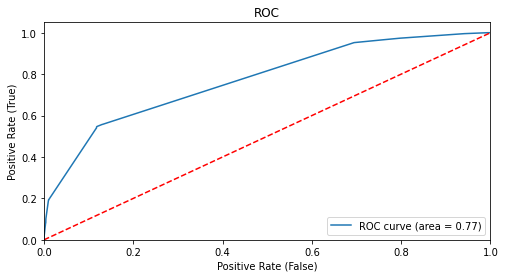

In [501]:
##Now we will plot the ROC curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
f, t, th = roc_curve( final_p_YTrain.Converted, final_p_YTrain.Converted_probability,drop_intermediate = False )   
ascore = roc_auc_score( final_p_YTrain.Converted, final_p_YTrain.Converted_probability )    
plt.figure(figsize=(8, 4))
plt.plot( f, t, label='ROC curve (area = %0.2f)' % ascore )
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Positive Rate (False)')
plt.ylabel('Positive Rate (True)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show

In [504]:
### Now we should not that the area under the curve is 77%
final_p_YTrain.Converted

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

In [505]:
final_p_YTrain.Converted_probability

1871    0.312479
6795    0.312479
3516    0.312479
8105    0.634342
3934    0.312479
          ...   
350     0.797741
79      0.797741
8039    0.312479
6936    0.114811
5640    0.312479
Name: Converted_probability, Length: 6468, dtype: float64

In [512]:
from sklearn import metrics
final_p_YTrain['final_predicted'] = final_p_YTrain.Converted_probability.map( lambda x: 1 if x > 0.42 else 0)

## now lets calculate the accuracy score
metrics.accuracy_score(final_p_YTrain.Converted,  final_p_YTrain.final_predicted)



0.7506184291898578

In [513]:
##create the confusion metrix

conf = metrics.confusion_matrix(final_p_YTrain.Converted, final_p_YTrain.final_predicted )
conf

array([[3481,  521],
       [1092, 1374]])

In [517]:
TP = conf[1,1] 
TN = conf[0,0] 
FP = conf[0,1] 
FN = conf[1,0] 

#now based on this we can calculate sensitivity and Specificity
TP/(TP+FN)

0.5571776155717761

In [518]:
TN/(TN+FP)

0.8698150924537731

### Conclusion

we can conclude that the model can be adjusted according to the requirements of company. 
We should focus on converted leads